<a href="https://colab.research.google.com/github/guen-a-park/Parcel-locker-Innov/blob/main/(%ED%83%9D%EB%B0%B0_%EB%AC%BC%EB%8F%99_%EC%98%88%EC%B8%A1%EB%9F%89%2C1%EC%9D%B8%EA%B0%80%EA%B5%AC%EB%B9%84%EC%9C%A8)clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly
!pip install chart_studio
import chart_studio
chart_studio.tools.set_credentials_file(username='', api_key='')
import chart_studio.plotly as py
import plotly.express as px

     |████████████████████████████████| 64 kB 2.2 MB/s 


# **Visualize data points**

In [ ]:
import os.path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
#한글깨지는 문제
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()


Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#민아경로
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#근아 경로
%cd /content/drive/MyDrive/공공 빅데이터 분석 공모전/clustering

/content/drive/MyDrive/공공 빅데이터 분석 공모전/clustering


In [ ]:
#csv 읽어오기
data = pd.read_csv('clustering_example_2.csv',engine='python',encoding='CP949')
data = data.head(425)
data

,동,배달 빈도수,1인가구비율
0,서울특별시 종로구 사직동,0.304124,0.469098
1,서울특별시 종로구 삼청동,0.158427,0.442994
2,서울특별시 종로구 부암동,0.278262,0.346539
3,서울특별시 종로구 평창동,0.380333,0.219388
4,서울특별시 종로구 무악동,0.294544,0.168656
...,...,...,...
420,서울특별시 강동구 둔촌1동,0.000000,0.572306
421,서울특별시 강동구 둔촌2동,0.374512,0.264624
422,서울특별시 강동구 암사1동,0.517685,0.368977
423,서울특별시 강동구 천호2동,0.486896,0.495354


In [ ]:
#clustering 위해 동이름 제거
data_cluster = data[['배달 빈도수','1인가구비율']]
data_cluster = data_cluster.rename(columns = {'배달 빈도수':'택배 물동 예측량','1인가구비율':'1인 가구 비율'})
data_cluster

,택배 물동 예측량,1인 가구 비율
0,0.304124,0.469098
1,0.158427,0.442994
2,0.278262,0.346539
3,0.380333,0.219388
4,0.294544,0.168656
...,...,...
420,0.000000,0.572306
421,0.374512,0.264624
422,0.517685,0.368977
423,0.486896,0.495354


Text(0, 0.5, '1 household')

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


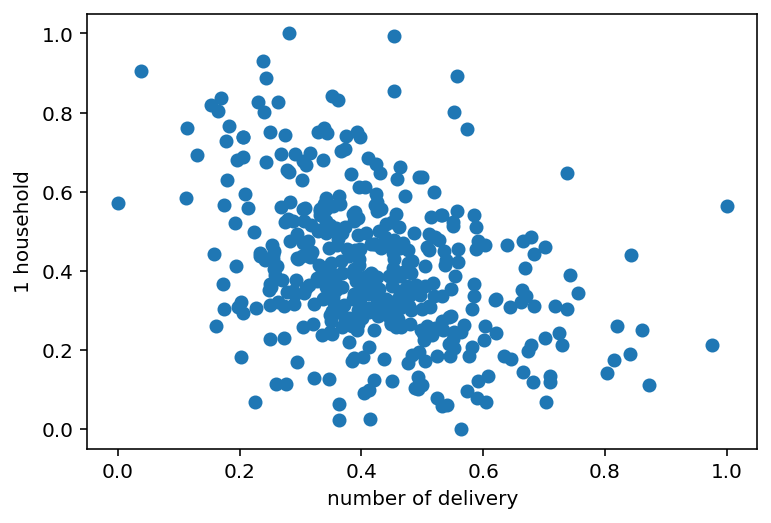

In [ ]:
#데이터 시각화
plt.scatter(data['배달 빈도수'],data['1인가구비율'])
plt.xlabel('number of delivery')
plt.ylabel('1 household')
#plt.title('단순 시각화')

In [ ]:
#data type numpy로 바꾸기
data_np_cluster = pd.DataFrame(data_cluster).to_numpy()
data_np_cluster


# **Elbow Method**
for dermining the optimal numbers of cluster in K-means clustering

In [ ]:
# Import required packages

from sklearn.cluster import KMeans


In [ ]:
#바로 csv 불러오기

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_np_cluster)
    Sum_of_squared_distances.append(km.inertia_)

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


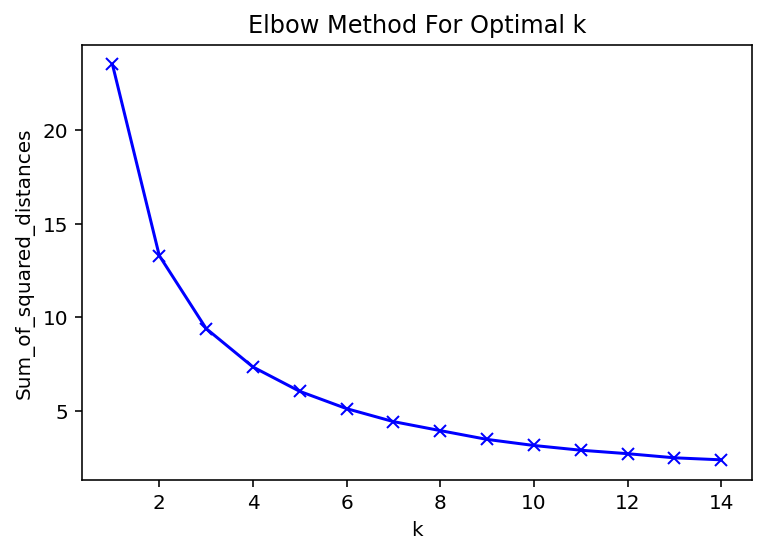

'\n그래프가 꺾이는 모양이 팔꿈치 같아 Elbow method라고 불린다.\n그림상 3 or 4\n'

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

"""
그래프가 꺾이는 모양이 팔꿈치 같아 Elbow method라고 불린다.
그림상 3 or 4
"""

# **Spectral Clustering**

cluster index
(array([  0,   1,   2,   3,   4,   5,   6,  10,  11,  12,  13,  15,  18,
        32,  33,  35,  36,  37,  39,  40,  41,  42,  43,  45,  55,  59,
        60,  69,  82,  83,  85,  86,  87,  90,  92,  93,  94,  95,  96,
        97,  98, 100, 101, 102, 103, 104, 106, 109, 110, 113, 114, 115,
       116, 117, 119, 120, 121, 122, 123, 124, 125, 129, 131, 132, 133,
       134, 136, 138, 139, 141, 143, 144, 145, 148, 150, 152, 154, 155,
       157, 160, 161, 163, 165, 167, 168, 169, 171, 172, 173, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       192, 193, 194, 195, 196, 197, 199, 200, 202, 203, 206, 208, 209,
       211, 212, 213, 215, 219, 221, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 234, 242, 245, 246, 247, 249, 255, 256, 265, 268,
       270, 275, 283, 289, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       302, 303, 304, 306, 311, 312, 314, 315, 316, 318, 319, 320, 325,
       331, 335, 338, 339, 340, 345, 351, 352, 35

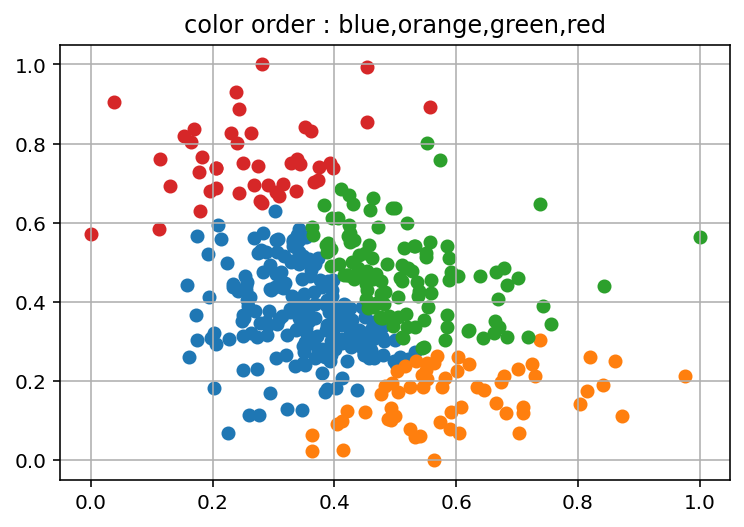

In [ ]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.cluster import SpectralClustering

# define the model
model = SpectralClustering(n_clusters=4) #cluster 개수 조정,n_clusters=3
# fit model and predict clusters
yhat = model.fit_predict(data_np_cluster)
# retrieve unique clusters
clusters = unique(yhat)

#yhat pd에 추가하기
df = pd.DataFrame(yhat, columns = ['cluster'])
data_plot = pd.concat([data_cluster,df], axis=1)

fig = px.scatter(data_plot, x="택배 물동 예측량", y='1인 가구 비율',color = "cluster", symbol="cluster",width=800, height=600)

fig.update(layout_showlegend=False,layout_coloraxis_showscale=False, layout_font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))

fig.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    print("cluster index")
    print(row_ix)
    print("구성요소 개수 :", data_np_cluster[row_ix, 0].size)
    print("각각의 평균 출력")
    print(data_np_cluster[row_ix, 0].mean())
    print(data_np_cluster[row_ix, 1].mean())
    # create scatter of these samples
    plt.scatter(data_np_cluster[row_ix, 0], data_np_cluster[row_ix, 1])


# show the plot
plt.title("color order : blue,orange,green,red") 
plt.grid()
plt.show()


In [ ]:
#각 cluster마다 feature 평균값 및 개수 뽑아내기 (ppt 표로 그리기)
#최종 induster 결정하기
#예)4번 cluster, index로 열 추출

final_cluster = data.loc[[7,   8,   9,  14,  16,  19,  20,  21,  22,  23,  27,  34,  50, 61,  65,  66,  
                          71,  72,  80,  81,  91,  99, 112, 127, 204, 207, 210, 214, 241, 250, 251, 262, 
                          271, 276, 291, 301, 309, 321, 322,323, 324, 326, 327, 328, 329, 330, 332, 333, 336, 359, 365, 387,398]]
final_cluster

# **Gaussian Mixture Clustering**

cluster index
(array([ 29,  38,  52,  53,  62,  63,  64,  74,  75, 147, 149, 156, 159,
       162, 174, 198, 216, 237, 257, 261, 267, 277, 278, 279, 281, 282,
       343, 344, 346, 366, 368, 375, 378, 389, 398, 404]),)
구성요소 개수 : 36
각각의 평균 출력
0.7356759504166667
0.2973532606361111
cluster index
(array([  7,   8,   9,  10,  14,  16,  17,  19,  20,  21,  22,  23,  27,
        34,  40,  41,  44,  50,  61,  65,  66,  71,  80,  81,  84,  91,
        99, 112, 127, 204, 207, 210, 214, 250, 262, 271, 276, 291, 301,
       304, 309, 321, 322, 323, 324, 326, 327, 328, 329, 330, 332, 333,
       336, 359, 365, 420]),)
구성요소 개수 : 56
각각의 평균 출력
0.2877344338785714
0.7380897129107142
cluster index
(array([  0,   1,   2,   5,   6,  11,  12,  13,  15,  18,  24,  25,  26,
        28,  30,  32,  33,  35,  36,  37,  43,  45,  46,  47,  48,  49,
        51,  55,  56,  57,  58,  59,  60,  67,  68,  69,  72,  76,  79,
        82,  83,  85,  86,  88,  89,  92,  93,  94,  95,  96,  97,  98,
       100, 101, 102, 1

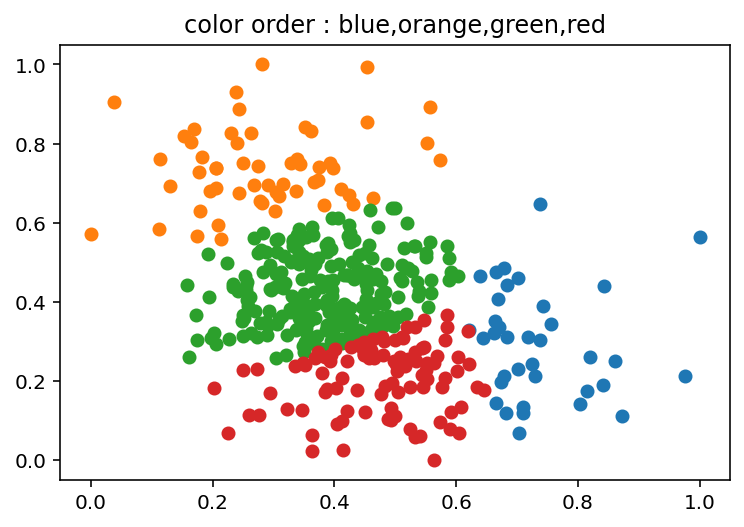

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture

# define the model
model = GaussianMixture(n_components=4) #cluster 개수 조정, n_components=2
# fit the model
model.fit(data_np_cluster)

# assign a cluster to each example
yhat = model.predict(data_np_cluster)
# retrieve unique clusters
clusters = unique(yhat)

#yhat pd에 추가하기
df = pd.DataFrame(yhat, columns = ['cluster'])
data_plot = pd.concat([data_cluster,df], axis=1)

fig = px.scatter(data_plot, x="택배 물동 예측량", y='1인 가구 비율',color = "cluster", symbol="cluster",width=800, height=600)

fig.update(layout_showlegend=False,layout_coloraxis_showscale=False, layout_font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))

fig.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    #print(row_ix)
    # create scatter of these samples
    print("cluster index")
    print(row_ix)
    print("구성요소 개수 :", data_np_cluster[row_ix, 0].size)
    print("각각의 평균 출력")
    print(data_np_cluster[row_ix, 0].mean())
    print(data_np_cluster[row_ix, 1].mean())
    # create scatter of these samples
    plt.scatter(data_np_cluster[row_ix, 0], data_np_cluster[row_ix, 1])

#show the plot
plt.title("color order : blue,orange,green,red") 
plt.show()


# **K-Medoids Clustering**

[[0.34177717 0.58382291]
 [0.53890451 0.42674994]
 [0.34755899 0.35829706]
 [0.50349703 0.22355876]]


cluster index
(array([  7,   8,   9,  10,  14,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  27,  33,  34,  40,  41,  43,  44,  45,  46,  47,  50,
        57,  58,  59,  60,  61,  65,  66,  67,  69,  71,  72,  79,  80,
        81,  82,  84,  85,  86,  91,  99, 101, 107, 112, 113, 116, 121,
       125, 126, 127, 130, 135, 137, 175, 181, 190, 202, 204, 205, 207,
       210, 211, 212, 214, 215, 219, 228, 241, 250, 256, 262, 271, 276,
       287, 289, 291, 295, 298, 301, 302, 304, 309, 311, 315, 319, 321,
       322, 323, 324, 325, 326, 327, 328, 329, 330, 332, 333, 336, 356,
       359, 360, 364, 365, 387, 399, 416, 418, 420]),)
구성요소 개수 : 113
각각의 평균 출력
0.3247631763026549
0.6383722294159291
cluster index
(array([ 26,  28,  29,  30,  48,  49,  51,  56,  62,  63,  68,  70,  73,
        74,  76,  77,  88,  89, 108, 128, 142, 147, 156, 158, 159, 174,
       191, 201, 216, 217, 218, 220, 239, 243, 244, 248, 251, 252, 254,
       257, 258, 263, 264, 269, 272, 277, 278, 279, 280, 281,

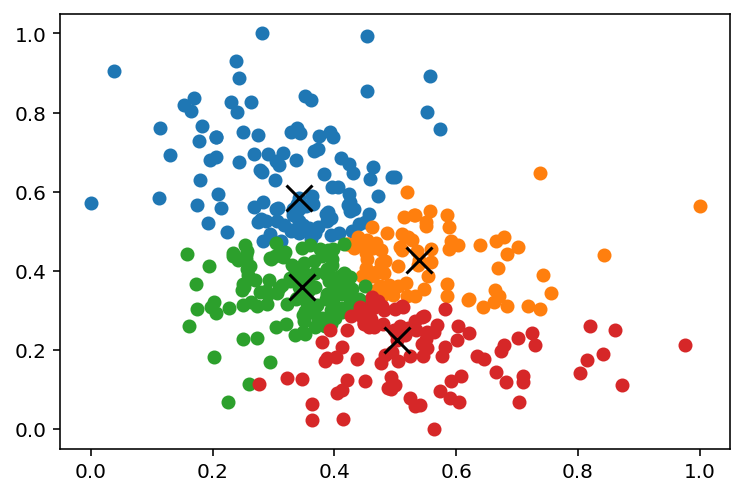

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


model = KMedoids(n_clusters=4, random_state=0).fit(data_np_cluster)
centroids = model.cluster_centers_
print(centroids)
# assign a cluster to each example
yhat = model.predict(data_np_cluster)
# retrieve unique clusters
clusters = unique(yhat)

#yhat pd에 추가하기
df = pd.DataFrame(yhat, columns = ['cluster'])
data_plot = pd.concat([data_cluster,df], axis=1)

fig = px.scatter(data_plot, x="택배 물동 예측량", y='1인 가구 비율',color = "cluster", symbol="cluster",width=800, height=600)

fig.update(layout_showlegend=False,layout_coloraxis_showscale=False, layout_font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))

fig.show()

# create scatter plot for samples from each cluster
i =0
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    #print(row_ix)
    # create scatter of these samples
    print("cluster index")
    print(row_ix)
    print("구성요소 개수 :", data_np_cluster[row_ix, 0].size)
    print("각각의 평균 출력")
    print(data_np_cluster[row_ix, 0].mean())
    print(data_np_cluster[row_ix, 1].mean())
    # create scatter of these samples
    plt.scatter(x = data_np_cluster[row_ix, 0], y =data_np_cluster[row_ix, 1])   
    plt.scatter(centroids[i, 0],centroids[i, 1],s=169,c = 'black',marker="x")
    i = i+1

# #show the plot
# plt.title("color order : blue,orange,green,red") 
# pyplot.show()


In [ ]:
final_cluster = data.loc[{7,8,9,14,16,17,19,20,21,22,23,27,29,34,44,50,61,62,63,65,66,71,74,80,81,84,91,99,
                          112,127,147,159,174,204,207,210,214,216,250,257,262,271,276,277,278,279,281,291,
                          301,309,321,322,323,324,326, 327,328,329,330,332,333,336,344,346,359, 365,366,375,398,420}]
final_cluster

,동,배달 빈도수,1인가구비율
257,서울특별시 강서구 방화3동,0.683226,0.442336
262,서울특별시 구로구 구로3동,0.430228,0.646195
7,서울특별시 종로구 종로1·2·3·4가동,0.169705,0.837362
8,서울특별시 종로구 종로5·6가동,0.112938,0.761185
9,서울특별시 종로구 이화동,0.195121,0.680435
...,...,...,...
366,서울특별시 강남구 역삼2동,0.668825,0.405996
112,서울특별시 성북구 안암동,0.230736,0.825806
375,서울특별시 강남구 세곡동,0.671060,0.336747
250,서울특별시 강서구 가양1동,0.572791,0.757416


In [ ]:
list1 = [ 24,  25,  26,  28,  29,  30,  44,  46,  47,  48,  49,  51,  54,
        56,  57,  58,  62,  63,  66,  67,  68,  70,  72,  73,  74,  76,
        77,  79,  88,  89, 107, 108, 126, 128, 130, 135, 137, 142, 147,
       151, 158, 159, 174, 175, 191, 201, 205, 216, 217, 218, 220, 239,
       241, 243, 244, 248, 250, 251, 252, 254, 257, 258, 262, 263, 264,
       266, 269, 272, 273, 277, 278, 279, 280, 281, 284, 285, 287, 288,
       290, 305, 307, 308, 309, 310, 313, 317, 324, 334, 337, 341, 342,
       344, 346, 355, 360, 362, 364, 365, 366, 372, 374, 375, 377, 387,
       390, 392, 393, 398, 399, 416, 422, 423, 424]

list2 = [ 26,  28,  29,  30,  48,  49,  51,  56,  62,  63,  68,  70,  73,
        74,  76,  77,  88,  89, 108, 128, 142, 147, 156, 158, 159, 174,
       191, 201, 216, 217, 218, 220, 239, 243, 244, 248, 251, 252, 254,
       257, 258, 263, 264, 269, 272, 277, 278, 279, 280, 281, 284, 285,
       288, 290, 305, 307, 308, 313, 317, 337, 339, 341, 342, 344, 346,
       355, 362, 366, 372, 374, 375, 377, 381, 390, 392, 393, 394, 398,
       415, 422, 423, 424]

union = list(set(list1) | set(list2))
print( union ) #합집합

[24, 25, 26, 28, 29, 30, 44, 46, 47, 48, 49, 51, 54, 56, 57, 58, 62, 63, 66, 67, 68, 70, 72, 73, 74, 76, 77, 79, 88, 89, 107, 108, 126, 128, 130, 135, 137, 142, 147, 151, 156, 158, 159, 174, 175, 191, 201, 205, 216, 217, 218, 220, 239, 241, 243, 244, 248, 250, 251, 252, 254, 257, 258, 262, 263, 264, 266, 269, 272, 273, 277, 278, 279, 280, 281, 284, 285, 287, 288, 290, 305, 307, 308, 309, 310, 313, 317, 324, 334, 337, 339, 341, 342, 344, 346, 355, 360, 362, 364, 365, 366, 372, 374, 375, 377, 381, 387, 390, 392, 393, 394, 398, 399, 415, 416, 422, 423, 424]


In [ ]:
len(union)

118